# Importación de módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creación del dataframe

In [2]:
# Lectura de datos históricos
df = pd.read_csv('./datasets/info_prestamos.csv', encoding="ISO-8859-1", delimiter=',')

**INFORMACIÓN DEL DATASET**

https://www.kaggle.com/kunalvsingh93/banking-model-multiclass-classification?select=train_loan.csv

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

Interest_Rate --> Tasa de interés asignada, a mayor valor se considera mayor riesgo y por tanto tasa más elevada


In [3]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [5]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

# Limpieza **inicial** del dataframe

In [6]:
"""
Si una columna tiene un alto porcentaje de valores nulos, no conviene utilizarla como variable
"""
# Eliminamos las variables con alto porcentaje de valores nulos

#   Creamos una serie de pandas con el número de valores nulos de cada variable
"""
    Una serie es un dataframe de una sola columna. En este caso creamos las cabeceras con su respectiva cantidad de valores nulos.
"""
df_var = df.isnull().sum()

#   Establecemos un porcentaje como límite para valores nulos (20%)
"""
En este caso seleccionamos un porcentaje alto debido que con un porcentaje inferior eliminaríamos columnas importantes para el cálculo de la 
capacidad crediticia como el ingreso anual y la posesión de inmueble.
"""
pcje_eliminacion = .2

#   Dejamos unicamente las variables que tienen un porcentaje de valores nulos menor al límite establecido
df_var = df_var[df_var<pcje_eliminacion*len(df)]

#   Creamos una lista con los nombres de las variables que nos interesan (los índices de de la serie)
lista_variables_OK = df_var.index

#   Filtramos el dataframe original y nos quedamos unicamente con las columnas que cumplen nuestros requisitos
df = df[lista_variables_OK]

# Vemos como va quedando el dataframe
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [7]:
# Vemos la información estadística del dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164309.0,1.008216e+07,47432.067027,10000001.0,10041078.00,10082155.00,10123232.00,10164309.00
Annual_Income,139207.0,7.333116e+04,60377.498294,4000.0,45000.00,63000.00,88697.50,7500000.00
Debt_To_Income,164309.0,1.720719e+01,7.845083,0.0,11.37,16.84,22.78,39.99
Inquiries_Last_6Mo,164309.0,7.816979e-01,1.034747,0.0,0.00,0.00,1.00,8.00
Number_Open_Accounts,164309.0,1.119382e+01,4.991813,0.0,8.00,10.00,14.00,76.00
Total_Accounts,164309.0,2.506767e+01,11.583067,2.0,17.00,23.00,32.00,156.00
Interest_Rate,164309.0,2.158951e+00,0.738364,1.0,2.00,2.00,3.00,3.00


In [8]:
"""
Para lograr un dataframe limpio los registros con valores nulos se deben eliminar, interpolar o correlacionar con otras variables para asignar el promedio
en base a la variable con mayor correlación
"""

# Verificamos las columnas que contienen valores nulos
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed           7371
Home_Owner               25349
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [9]:
"""
Comenzamos con la limpieza de Length_Employed
"""

# Vemos los valores únicos de la columna Length_Employed
df['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [10]:
# Reemplazamos el valor '< 1 year' por '0 years' para diferenciarlo de '1 year'
df['Length_Employed'] = df['Length_Employed'].str.replace('< 1 year', '0 years')

# Extraemos el caracter numérico de cada uno de los valores
df['Length_Employed'] = df['Length_Employed'].str.extract('(\d+)')

# Convertimos la columna a formato numérico
df['Length_Employed'] = df['Length_Employed'].apply(pd.to_numeric)

df['Length_Employed']

0          0.0
1          4.0
2          7.0
3          0.0
4          8.0
          ... 
164304    10.0
164305     8.0
164306    10.0
164307     4.0
164308    10.0
Name: Length_Employed, Length: 164309, dtype: float64

In [11]:
# Limpiamos los valores erroneos de Length_Employed a partir de la correlación con otras variables
print("Correlación con Length_Employed:")
df.corr()['Length_Employed'].sort_values()

Correlación con Length_Employed:


Inquiries_Last_6Mo     -0.006522
Loan_ID                 0.000152
Interest_Rate           0.030404
Number_Open_Accounts    0.037321
Debt_To_Income          0.049020
Annual_Income           0.069505
Total_Accounts          0.111460
Length_Employed         1.000000
Name: Length_Employed, dtype: float64

In [12]:
"""
Seleccionamos la variable que mayor correlación tiene con Length_Employed (Total_Accounts) y la utilizamos para completar los valores nulos en 
la columna Length_Employed
"""
# Vemos el promedio de Length_Employed por Total_Accounts
print('Total_Accounts | Promedio Length_Employed')
df.groupby('Total_Accounts').mean()['Length_Employed']


Total_Accounts | Promedio Length_Employed


Total_Accounts
2       2.500000
3       2.709924
4       3.662551
5       4.180240
6       4.260575
         ...    
99     10.000000
102     7.000000
105    10.000000
116    10.000000
156    10.000000
Name: Length_Employed, Length: 100, dtype: float64

In [13]:
# Creamos una variable con esos valores
total_acc_avg = df.groupby('Total_Accounts').mean()['Length_Employed']

# Creamos una función que retorne el valor (promedio de Length_Employed) correspondiente al índice (Total_accounts) indicado
def completar_len_emp(total_acc, len_emp):
    if np.isnan(len_emp):
        return total_acc_avg[total_acc]
    else:
        return len_emp

# Realizamos la sustitución de los valores nulos de Length_Employed por el promedio correspondiente
df['Length_Employed'] = df.apply(lambda x: completar_len_emp(x['Total_Accounts'], x['Length_Employed']), axis=1)

In [14]:
# Corroboramos que la cantidad de valores nulos en la columna sea 0
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner               25349
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [15]:
"""
Seguimos con la limpieza de Home_Owner
"""

# Visualizamos la cuenta de valores de la columna
df['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

<AxesSubplot: xlabel='Home_Owner'>

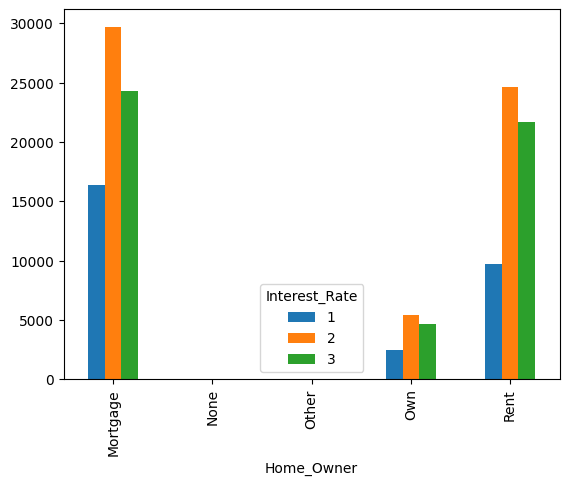

In [16]:
# Calculamos la distribución de valores de la variable objetivo (Interest_Rate) respecto a las diferentes categorías de Home_Owner

# Creamos una pivot_table utilizando como índice (eje x) Home_Owner, como columnas Interest_Rate y como valores (eje y) el conteo (aggfunc='count') de cualquier 
# otra columna. Esto es para obtener la cantidad de registros que posee cada categoría de Interest_Rate para cada categoría de Home_Owner. Esto lo mostramos en
# un plot de tipo barras
df.pivot_table(index='Home_Owner', columns='Interest_Rate', values='Loan_ID', aggfunc='count').plot(kind='bar')

En este gráfico podemos ver que la categoría 2 de Interest_Rate es la que mayor cantidad de casos contiene en todas las categorías de Home_Owner.

También podemos ver que la categoría 3 de Interest_Rate contiene, porcentualmente, una mayor cantidad de casos en la categoría Rent de Home_Owner que en el resto.

Por otro lado la categoría Mortgage de Home_Owner es la que mayor cantidad de casos en general contiene.

De esta forma, decidimos que aquellos registros con valor nulo para Home_Owner y valor 3 de Interest_Rate pasarán a formar parte de Rent. En cambio, aquellos registros con valor nulo para Home_Owner y valor 1 o 2 de Interest_Rate, pasarán a formar parte de Mortgage.

In [17]:
# Creamos una función que retorne 'Rent' siempre que Home_Owner sea nulo o vacío e Interest_Rate sea 3 y retorne 'Mortgage' siempre que Home_Owner
# sea nulo o vacío e Interest_Rate sea 1 o 2

def completar_home_owner(home_owner, interest_rate):
    if home_owner == '':
        if interest_rate == 3:
            return 'Rent'
        else:
            return 'Mortgage'
    else:
        return home_owner

# Reemplazamos los valores nulos por valores vacíos
df['Home_Owner'] = df['Home_Owner'].replace(np.nan, '')

# Reemplazamos los valores vacíos por los correspondientes según su valor de Interest_Rate
df['Home_Owner'] = df.apply(lambda x: completar_home_owner(x['Home_Owner'], x['Interest_Rate']), axis=1)

# Corroboramos que ya no poseemos valores nulos
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner                   0
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

(array([1.17229e+05, 1.97800e+04, 1.62000e+03, 3.19000e+02, 1.29000e+02,
        4.80000e+01, 1.90000e+01, 2.20000e+01, 1.50000e+01, 8.00000e+00]),
 array([  4000. , 103599.9, 203199.8, 302799.7, 402399.6, 501999.5,
        601599.4, 701199.3, 800799.2, 900399.1, 999999. ]),
 <BarContainer object of 10 artists>)

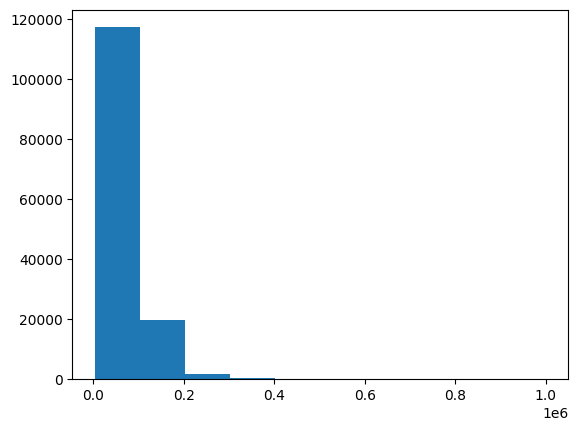

In [18]:
"""
Por último, continuamos con la limpieza de la variable Annual_Income
"""

# Creamos un dataframe auxiliar con los valores de Annual_Income por debajo del percentil 75
df_aux = df[df['Annual_Income']<1000000]

# Creamos un histograma basándonos en el df auxiliar
plt.hist(df_aux['Annual_Income'], bins=10)

Podemos observar que la mayoría de los casos tienen un Annual_Income inferior a $100000

In [19]:
# Limpiamos los valores nulos de Annual_Income a partir de su correlación con otras variables
print("Correlación con Annual_Income:")
df.corr()['Annual_Income'].sort_values()

Correlación con Annual_Income:


Debt_To_Income         -0.173589
Interest_Rate          -0.052783
Loan_ID                 0.008326
Inquiries_Last_6Mo      0.060011
Length_Employed         0.070139
Number_Open_Accounts    0.145822
Total_Accounts          0.203237
Annual_Income           1.000000
Name: Annual_Income, dtype: float64

In [20]:
"""
Seleccionamos la variable que mayor correlación tiene con Annual_Income (Total_Accounts) y la utilizamos para completar los valores nulos en 
la columna Annual_Income
"""
# Vemos el promedio de Annual_Income por Total_Accounts
print('Total_Accounts | Promedio Annual_Income')
df.groupby('Total_Accounts').mean()['Annual_Income']

Total_Accounts | Promedio Annual_Income


Total_Accounts
2       88617.400000
3       36087.616140
4       44522.606276
5       45691.847537
6       47686.809039
           ...      
99      97000.000000
102              NaN
105     38000.000000
116    240000.000000
156     42000.000000
Name: Annual_Income, Length: 100, dtype: float64

In [21]:
# Creamos una variable con esos valores
total_acc_inc_avg = df.groupby('Total_Accounts').mean()['Annual_Income']

# Creamos una función que retorne el valor (promedio de Length_Employed) correspondiente al índice (Total_accounts) indicado
def completar_annual_income(total_acc, annual_inc):
    if np.isnan(annual_inc):
        return total_acc_inc_avg[total_acc]
    else:
        return annual_inc

# Realizamos la sustitución de los valores nulos de Length_Employed por el promedio correspondiente
df['Annual_Income'] = df.apply(lambda x: completar_annual_income(x['Total_Accounts'], x['Annual_Income']), axis=1)

In [22]:
# Corroboramos que la cantidad de valores nulos en la columna sea 0
df.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            1
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [23]:
# Como quedó sólo un registro nulo lo eliminamos
df.dropna(inplace=True)

# Verificamos la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164308 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164308 non-null  int64  
 1   Loan_Amount_Requested  164308 non-null  object 
 2   Length_Employed        164308 non-null  float64
 3   Home_Owner             164308 non-null  object 
 4   Annual_Income          164308 non-null  float64
 5   Income_Verified        164308 non-null  object 
 6   Purpose_Of_Loan        164308 non-null  object 
 7   Debt_To_Income         164308 non-null  float64
 8   Inquiries_Last_6Mo     164308 non-null  int64  
 9   Number_Open_Accounts   164308 non-null  int64  
 10  Total_Accounts         164308 non-null  int64  
 11  Gender                 164308 non-null  object 
 12  Interest_Rate          164308 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 17.5+ MB


In [24]:
# Vemos las cabeceras
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.00000,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,73993.44661,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.40000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,Rent,56160.00000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.00000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [25]:
# Podemos ver que la columna Loan_Amount_Requested no es de tipo numérico, así que debemos transformarla para poder realizar los cálculos
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(',', '').apply(pd.to_numeric)

# Volvemos a verificar la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164308 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164308 non-null  int64  
 1   Loan_Amount_Requested  164308 non-null  int64  
 2   Length_Employed        164308 non-null  float64
 3   Home_Owner             164308 non-null  object 
 4   Annual_Income          164308 non-null  float64
 5   Income_Verified        164308 non-null  object 
 6   Purpose_Of_Loan        164308 non-null  object 
 7   Debt_To_Income         164308 non-null  float64
 8   Inquiries_Last_6Mo     164308 non-null  int64  
 9   Number_Open_Accounts   164308 non-null  int64  
 10  Total_Accounts         164308 non-null  int64  
 11  Gender                 164308 non-null  object 
 12  Interest_Rate          164308 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 17.5+ MB


In [26]:
# Volvemos a mostrar la información estadística del dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164308.0,1.008215e+07,47432.209880,10000001.0,10041077.75,10082154.50,1.012323e+07,10164309.00
Loan_Amount_Requested,164308.0,1.434928e+04,8281.859681,500.0,8000.00,12075.00,2.000000e+04,35000.00
Length_Employed,164308.0,5.990712e+00,3.548372,0.0,3.00,6.00,1.000000e+01,10.00
Annual_Income,164308.0,7.332921e+04,55796.901118,4000.0,48000.00,65000.00,8.560164e+04,7500000.00
Debt_To_Income,164308.0,1.720718e+01,7.845104,0.0,11.37,16.84,2.278000e+01,39.99
Inquiries_Last_6Mo,164308.0,7.817027e-01,1.034748,0.0,0.00,0.00,1.000000e+00,8.00
Number_Open_Accounts,164308.0,1.119383e+01,4.991828,0.0,8.00,10.00,1.400000e+01,76.00
Total_Accounts,164308.0,2.506720e+01,11.581547,2.0,17.00,23.00,3.200000e+01,156.00
Interest_Rate,164308.0,2.158945e+00,0.738363,1.0,2.00,2.00,3.000000e+00,3.00


# Visualización

<AxesSubplot: xlabel='Interest_Rate', ylabel='count'>

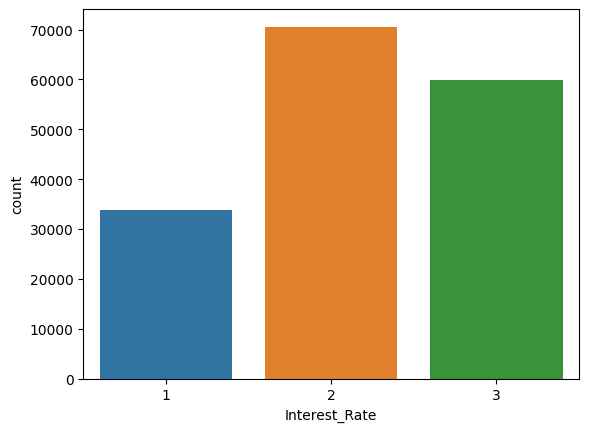

In [27]:
# Verificamos si hay una proporción equilibrada entre las diferentes categorías de la variable objetivo para un buen modelado posterior
sns.countplot(x='Interest_Rate', data=df)

<AxesSubplot: >

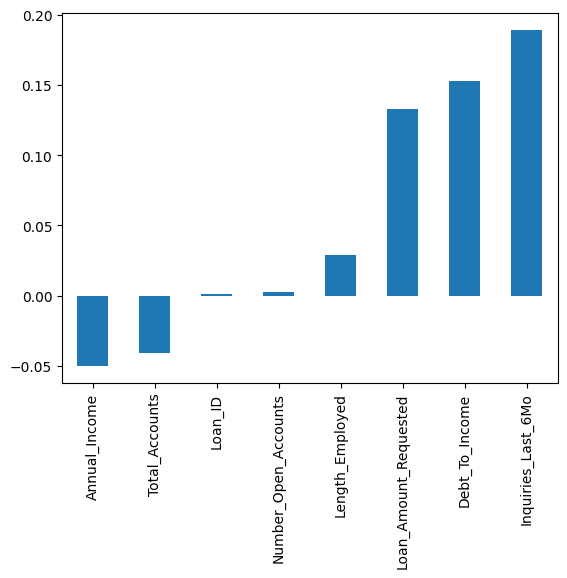

In [28]:
# Podemos generar un plot de barras con la correlación entre las variables de entrada y la variable objetivo
df.corr()['Interest_Rate'][:-1].sort_values().plot(kind='bar')

<AxesSubplot: >

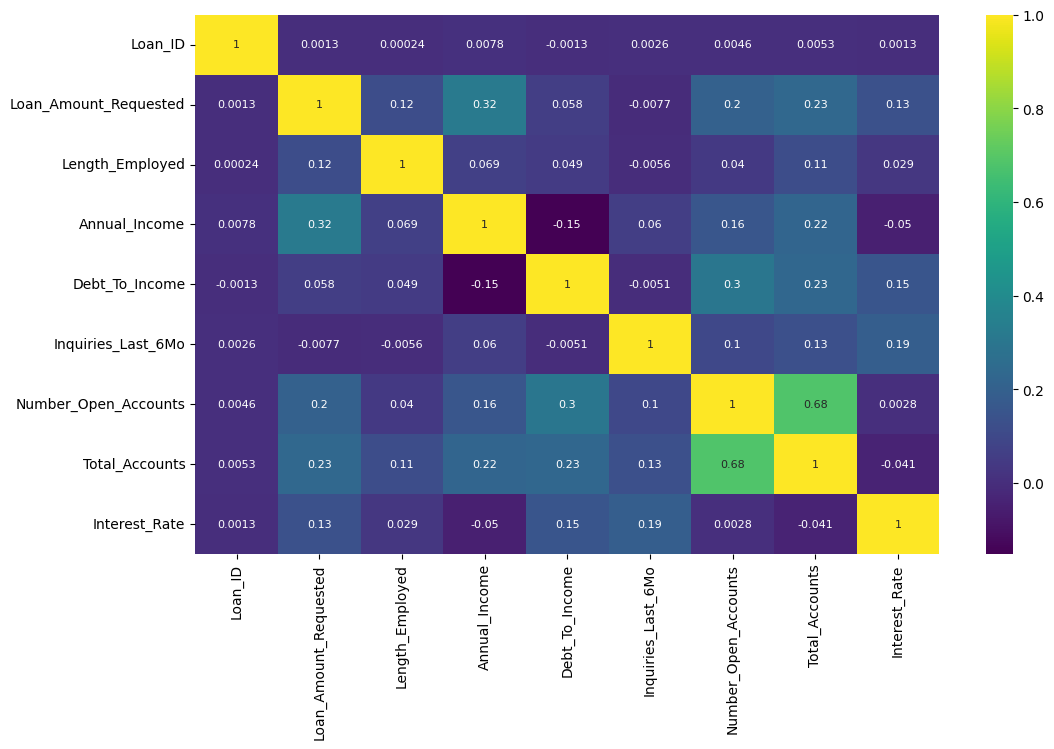

In [29]:
# Podemos generar un mapa de calor con la correlación entre las variables
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 8}, cmap='viridis')

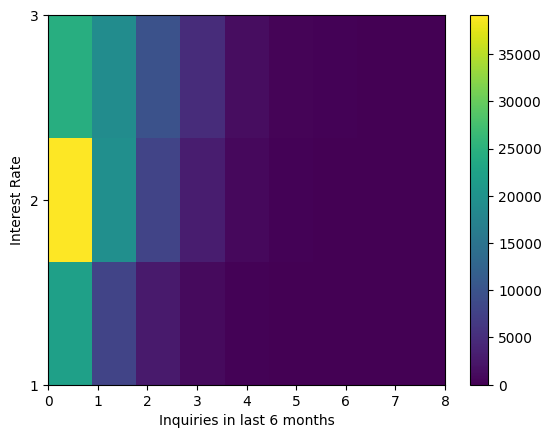

In [30]:
# Visualizamos las variables altamente correlacionadas con la variable objetivo

# Inquires_Last_6Mo (Si los valores están normalizados, lo mejor es utilizar un histograma 2D)
plt.hist2d(df['Inquiries_Last_6Mo'], df['Interest_Rate'], bins=(9,3), cmap='viridis')
plt.xlabel('Inquiries in last 6 months')
plt.ylabel('Interest Rate')
plt.yticks(range(1, 4, 1))
plt.colorbar()

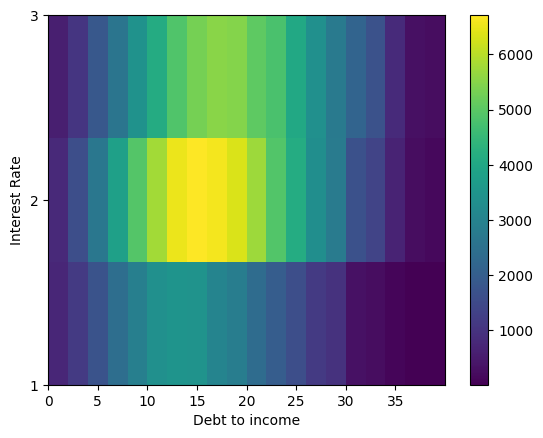

In [31]:
# Debt_To_Income (Si los valores están normalizados, lo mejor es utilizar un histograma 2D)
plt.hist2d(df['Debt_To_Income'], df['Interest_Rate'], bins=(20,3), cmap='viridis')
plt.xlabel('Debt to income')
plt.ylabel('Interest Rate')
plt.yticks(range(1, 4, 1))
plt.colorbar()

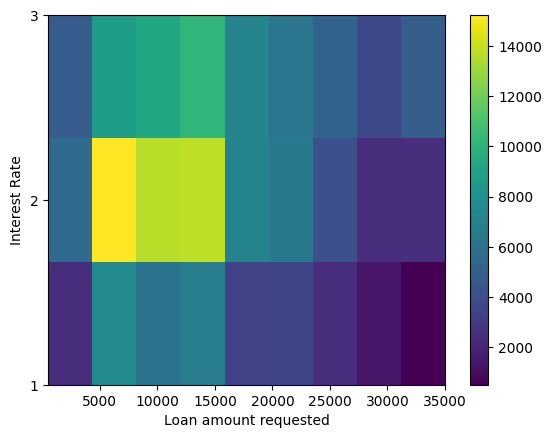

In [32]:
# Loan_Amount_Requested (Si los valores están normalizados, lo mejor es utilizar un histograma 2D)
plt.hist2d(df['Loan_Amount_Requested'], df['Interest_Rate'], bins=(9,3), cmap='viridis')
plt.xlabel('Loan amount requested')
plt.ylabel('Interest Rate')
plt.yticks(range(1, 4, 1))
plt.colorbar()

<AxesSubplot: xlabel='Gender'>

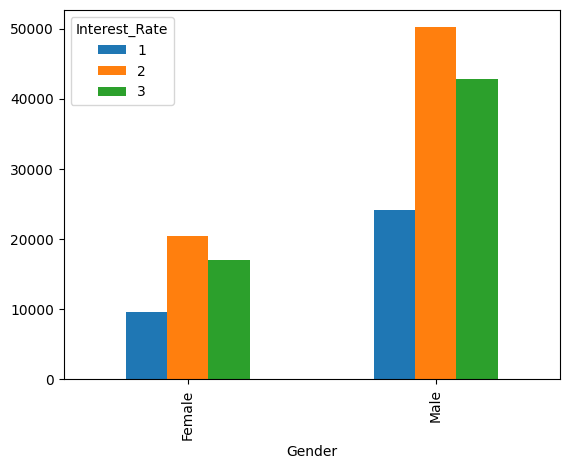

In [33]:
# Podemos verificar si hay alguna diferencia respecto al género del solicitante
df.pivot_table(index='Gender', columns='Interest_Rate', values='Loan_ID', aggfunc='count').plot(kind='bar')

<AxesSubplot: xlabel='Purpose_Of_Loan'>

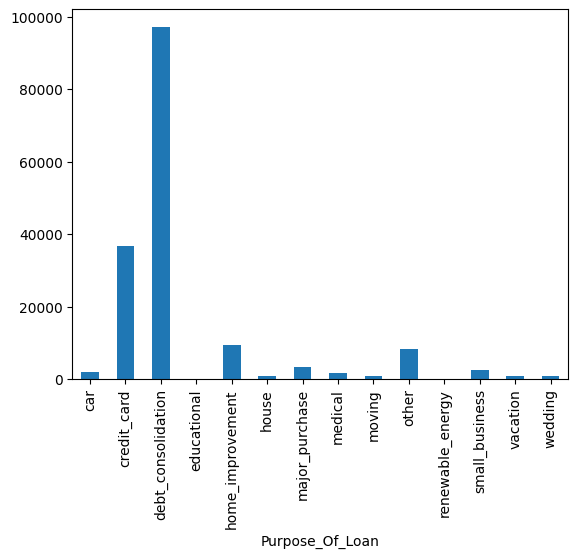

In [34]:
# Podemos verificar si los préstamos estan enfoncados en alguna finalidad en particular
df.groupby('Purpose_Of_Loan').agg('count')['Interest_Rate'].plot(kind='bar')

<AxesSubplot: xlabel='Purpose_Of_Loan'>

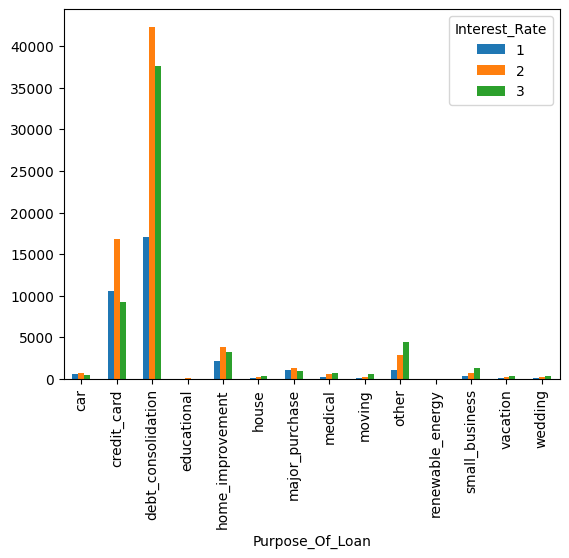

In [35]:
# Podemos verificar si hay alguna diferencia respecto a la finalidad del préstamo
df.pivot_table(index='Purpose_Of_Loan', columns='Interest_Rate', values='Loan_ID', aggfunc='count').plot(kind='bar')

# Limpieza **final**

In [36]:
"""
La limpieza final consiste en eliminar las variables que no tienen correlación con la variable objetivo, aquellas cuya información ya se encuentra
incluida en otras variables y aquellas que sólo representan una etiqueta de identificación
"""

df.info()
print('Correlacionadas con variable objetivo:')
df.corr()['Interest_Rate'].sort_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164308 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164308 non-null  int64  
 1   Loan_Amount_Requested  164308 non-null  int64  
 2   Length_Employed        164308 non-null  float64
 3   Home_Owner             164308 non-null  object 
 4   Annual_Income          164308 non-null  float64
 5   Income_Verified        164308 non-null  object 
 6   Purpose_Of_Loan        164308 non-null  object 
 7   Debt_To_Income         164308 non-null  float64
 8   Inquiries_Last_6Mo     164308 non-null  int64  
 9   Number_Open_Accounts   164308 non-null  int64  
 10  Total_Accounts         164308 non-null  int64  
 11  Gender                 164308 non-null  object 
 12  Interest_Rate          164308 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 17.5+ MB
Correlacionadas con variable ob

Annual_Income           -0.050086
Total_Accounts          -0.040741
Loan_ID                  0.001289
Number_Open_Accounts     0.002849
Length_Employed          0.029096
Loan_Amount_Requested    0.132479
Debt_To_Income           0.152470
Inquiries_Last_6Mo       0.188993
Interest_Rate            1.000000
Name: Interest_Rate, dtype: float64

In [37]:
# Eliminamos Number_Open_Accounts, Loan_ID y Income_Verified
df = df.drop(['Number_Open_Accounts', 'Loan_ID', 'Income_Verified'], axis=1)

# Vemos las cabeceras
df.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate
0,7000,0.0,Rent,68000.00000,car,18.37,0,14,Female,1
1,30000,4.0,Mortgage,73993.44661,debt_consolidation,14.93,0,24,Female,3
2,24725,7.0,Mortgage,75566.40000,debt_consolidation,15.88,0,16,Male,3
3,16000,0.0,Rent,56160.00000,debt_consolidation,14.34,3,22,Male,3
4,17000,8.0,Own,96000.00000,debt_consolidation,22.17,1,30,Female,1


# Transformación de variables categóricas

In [38]:
"""
Si vemos las cabeceras de nuestro dataframe, podemos observar que variables como Home_Owner, Purpose_Of_Loan y Gender corresponden a categorías. Para poder 
utilizarlas en nuestros cálculos, debemos transformarlas en valores numéricos haciendo uso de la técnica One Hot Encoder.
"""

df.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate
0,7000,0.0,Rent,68000.00000,car,18.37,0,14,Female,1
1,30000,4.0,Mortgage,73993.44661,debt_consolidation,14.93,0,24,Female,3
2,24725,7.0,Mortgage,75566.40000,debt_consolidation,15.88,0,16,Male,3
3,16000,0.0,Rent,56160.00000,debt_consolidation,14.34,3,22,Male,3
4,17000,8.0,Own,96000.00000,debt_consolidation,22.17,1,30,Female,1


In [39]:
# En primer lugar debemos verificar si vale la pena realizar algún filtrado de datos para ahorrar columnas 'dummy' si hay contadores bajos

# Vemos un conteo de Home_Owner             * Yo limpiaría las categorías Other y None pero el profesor no lo hace
df['Home_Owner'].value_counts()

Mortgage    86375
Rent        65349
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [40]:
# Vemos un conteo de Purpose_Of_Loan        * Yo limpiaría las categorías renewable_energy y educational pero el profesor no lo hace
df['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9268
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [41]:
# Vemos un conteo de Gender
df['Gender'].value_counts()

Male      117175
Female     47133
Name: Gender, dtype: int64

In [42]:
# Transformamos las categorías en variables 'dummies'

# Creamos las variables 'dummies' (se puede agregar drop_first=True para evitar redundancias y evitar crear una columna por cada variable)
dummies = pd.get_dummies(df[['Home_Owner', 'Purpose_Of_Loan', 'Gender']])

# Creamos un dataframe definitivo concatenando las columnas 'dummies' al dataframe original
df_post = pd.concat([df, dummies], axis=1)

# Eliminamos las columnas originales del dataframe definitivo
df_post = df_post.drop(['Home_Owner', 'Purpose_Of_Loan', 'Gender'], axis=1)

# Verificamos la información del dataframe definitivo
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164308 entries, 0 to 164308
Data columns (total 28 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Loan_Amount_Requested               164308 non-null  int64  
 1   Length_Employed                     164308 non-null  float64
 2   Annual_Income                       164308 non-null  float64
 3   Debt_To_Income                      164308 non-null  float64
 4   Inquiries_Last_6Mo                  164308 non-null  int64  
 5   Total_Accounts                      164308 non-null  int64  
 6   Interest_Rate                       164308 non-null  int64  
 7   Home_Owner_Mortgage                 164308 non-null  uint8  
 8   Home_Owner_None                     164308 non-null  uint8  
 9   Home_Owner_Other                    164308 non-null  uint8  
 10  Home_Owner_Own                      164308 non-null  uint8  
 11  Home_Owner_Rent           

# Train / Test split

In [43]:
# Dividimos los conjuntos X e y
X = df_post.drop('Interest_Rate', axis=1).values
y = df_post['Interest_Rate']

# En el caso de clasificación multiclase, debemos dividir la variable objetivos en variables 'dummies'
"""
Si la variable objetivo estuviese en formato string, se debería codificar la variable objetivo como integers y luego aplicar One Hot Encoding:
    > from keras.utils import np_utils
    > from sklearn.preprocessing import LabelEncoder
    >
    > encoder = LabelEncoder()
    > encoder.fit(y)
    > y = encoder.transfrorm(y)
    > y = np_utils.to_categorical(y)
"""
y = pd.get_dummies(y)

# Convertimos y en valores
y = y.values

# Vemos que ahora tenemos 3 columnas que representan cada una a una categoría y sus valores son booleanos (0/1)
y

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [44]:
# Realizamos el split en 75/25
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=101)

# Escalado

In [45]:
# Impotamos MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Creamos una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Adaptamos scaler a nuestro conjunto de entrenamiento
scaler.fit(X_train)

# Escalamos los conjuntos de prueba y entrenamiento
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creación del modelo

Para un problema de clasificación multiclase utilizamos como optimizador 'adam', en el argumento loss indicamos 'categorical_crossentropy', y 
como métrica utilizamos 'categorical_accuracy'

In [46]:
# Realizamos las importaciones necesarias
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Creamos un modelo secuencial
model = Sequential()

# Iteramos una variable con un número de neuronas igual a la cantidad de variables de entrada
num_neuronas = X_train.shape[1]

# Iteramos una variable con un número de neuronas igual a la cantidad de categorías a predecir
num_neuronas_salida = len(df['Interest_Rate'].unique())

# Elegimos un número de capas (https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)
# Creamos una capa oculta con una neurona por cada variable de entrada con función de activación ReLu
model.add(Dense(units=num_neuronas, activation='relu'))

# Creamos otra capa oculta con la mitad de neuronas (suele hacerse para acelerar el entrenamiento) con función de activación ReLu
model.add(Dense(units=num_neuronas/2, activation='relu'))

# Creamos una capa de salida con una neurona por cada variable de salida con función de activación Softmax (recomendada para clasificación multiclase)
model.add(Dense(units=num_neuronas_salida, activation='softmax'))

# Compilamos el modelo con optimizador adam, categorical_crossentropy en las pérdidas y como métrica categorical_accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Entrenamiento del modelo

**Información para poder elegir el número de iteraciones**

https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network

https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

In [47]:
# Importamos la clase EarlyStopping desde keras.callbacks
from keras.callbacks import EarlyStopping

# Definimos un objeto de EarlyStopping con monitorización en 'val_loss', modo 'min' y patience de 15.
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=15,
    verbose=1
)

# Ajustamos nuestro modelo a los conjuntos de entrenamiento, con 200 epochs y un tamaño de batch de 256 haciendo llamado a early_stop
model.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
482/482 [==============================] - 3s 4ms/step - loss: 0.9998 - categorical_accuracy: 0.4883 - val_loss: 0.9637 - val_categorical_accuracy: 0.5193
Epoch 2/200
482/482 [==============================] - 2s 3ms/step - loss: 0.9622 - categorical_accuracy: 0.5177 - val_loss: 0.9566 - val_categorical_accuracy: 0.5235
Epoch 3/200
482/482 [==============================] - 1s 3ms/step - loss: 0.9586 - categorical_accuracy: 0.5196 - val_loss: 0.9538 - val_categorical_accuracy: 0.5264
Epoch 4/200
482/482 [==============================] - 1s 3ms/step - loss: 0.9573 - categorical_accuracy: 0.5202 - val_loss: 0.9538 - val_categorical_accuracy: 0.5242
Epoch 5/200
482/482 [==============================] - 1s 3ms/step - loss: 0.9557 - categorical_accuracy: 0.5215 - val_loss: 0.9525 - val_categorical_accuracy: 0.5260
Epoch 6/200
482/482 [==============================] - 1s 3ms/step - loss: 0.9548 - categorical_accuracy: 0.5225 - val_loss: 0.9515 - val_categorical_accuracy: 0.526

<AxesSubplot: >

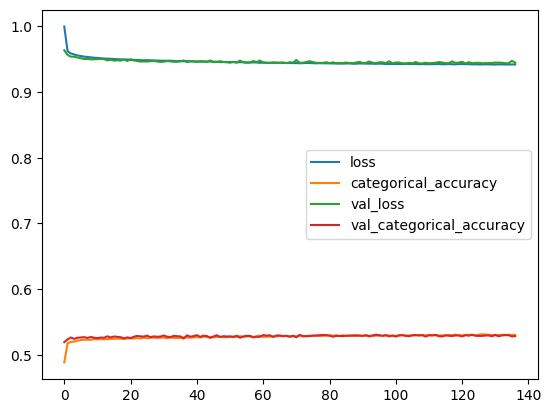

In [48]:
# Visualizamos las pérdidas
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Evaluación del modelo

In [49]:
# Importamos los métodos necesarios
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# Realizamos una predicción sobre el conjunto de test. Nos devuelve una matriz con las probabilidades de cada clase para cada registro
predictions = model.predict(X_test)
predictions

1284/1284 [==============================] - 2s 2ms/step


array([[0.04701634, 0.28940773, 0.6635759 ],
       [0.34828293, 0.41954654, 0.23217063],
       [0.34327394, 0.44359103, 0.21313503],
       ...,
       [0.21494469, 0.5848069 , 0.20024839],
       [0.10195479, 0.3734636 , 0.5245816 ],
       [0.31458214, 0.50378126, 0.1816366 ]], dtype=float32)

In [51]:
# Para poder realizar la comparativa realizamos un np.argmax, que nos devuelve un array con el índice de la clase con mayor probabilidad para cada registro
predictions_lab = np.argmax(predictions, axis=-1)
predictions_lab

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

In [52]:
# Definimos un array con el valor de la clase real para cada registro (el índice 0 corresponde a clase 1, el 1 a la 2 y el 2 a la 3)
predictions_lab_real = predictions_lab + 1
predictions_lab_real

array([3, 2, 2, ..., 2, 3, 2], dtype=int64)

In [53]:
# Creamos un dataframe con los valores reales y los nombres de las columnas
df_test_lab = pd.DataFrame(y_test, columns=['Interest Rate 1', 'Interest Rate 2', 'Interest Rate 3'])

# Creamos una columna en el nuevo dataframe que contenga la etiqueta de la clase real
    # np.where(condición, valor si verdadero, valor si falso)
df_test_lab['Clase Real'] = np.where(
    df_test_lab['Interest Rate 1'] == 1,                #-----------------------------Condición
    1,                                                  #-----------------------------Valor si verdadero
    np.where(                                           #----------------------------
        df_test_lab['Interest Rate 2'] == 1,            # Condición                 |
        2,                                              # Valor si verdadero        |-Valor si falso
        3                                               # Valor si falso            |
    )                                                   #----------------------------
)

In [54]:
# Creación de una matriz de confusión

# Definimos un array de las clases
clases = [1, 2, 3]

# Definimos un array a partir de los valores de la columna Clase Real convertidos en objetos de clase Numpy
array_clase_real = df_test_lab['Clase Real'].to_numpy()

# Creamos la matriz comparando el array de clases reales, con las predicciones, con las etiquetas que definimos en clases
confusion_matrix(array_clase_real, predictions_lab_real, labels=clases)

array([[ 1485,  5264,  1596],
       [ 1276, 10819,  5547],
       [  353,  5335,  9402]], dtype=int64)

In [55]:
# Creamos una función para generar un plot de la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    Source: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Not normalized confusion matrix')
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Not normalized confusion matrix
[[ 1485  5264  1596]
 [ 1276 10819  5547]
 [  353  5335  9402]]


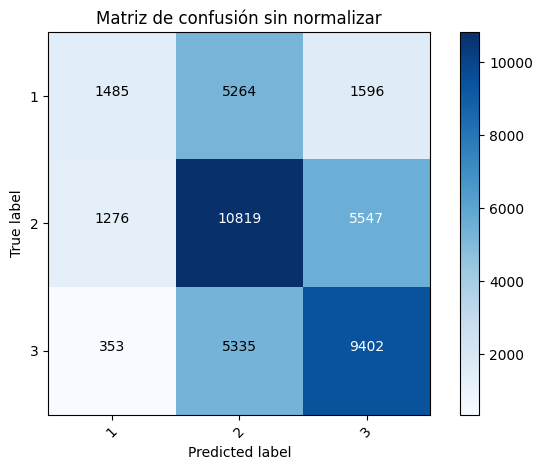

In [56]:
# Definimos una variable con la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_real, predictions_lab_real, labels=clases)
np.set_printoptions(precision=2)

# Creamos una figura
plt.figure()

# Ejecutamos la función para generar el plot de la matriz de confusión
plot_confusion_matrix(cnf_matrix, classes=clases, title='Matriz de confusión sin normalizar')

# Predicción de nuevos datos

In [61]:
# Creación del dataframe con los datos a predecir
df_pred = pd.read_excel('./datasets/info_prestamos_predecir.xlsx', sheet_name='info_prestamos_predecir')

# Filtramos el nuevo dataframe para quedarnos con las mismas columnas que en el dataframe histórico
df_pred = df_pred[df.columns]

# Transformamos las variables para que coincidan con el dataframe histórico

# Sustituimos '< 1 year' por '0 years' en la columna Length_Employed
df_pred['Length_Employed'] = df_pred['Length_Employed'].str.replace('< 1 year', '0 years')

# Nos quedamos únicamente con los valores numéricos de la columna Length_Employed
df_pred['Length_Employed'] = df_pred['Length_Employed'].str.extract('(\d+)')

# Convertimos la columna Length_Employed en datos numéricos
df_pred['Length_Employed'] = df_pred['Length_Employed'].apply(pd.to_numeric)

# Completamos los valores nulos si los hubiera
df_pred['Length_Employed'] = df_pred.apply(lambda x: completar_len_emp(x['Total_Accounts'], x['Length_Employed']), axis=1)

# Creamos las columnas dummies
dummies_pred = pd.get_dummies(df_pred[['Home_Owner', 'Purpose_Of_Loan', 'Gender']])

# Añadimos las columnas dummies 
df_post_pred = pd.concat([df_pred, dummies_pred], axis=1)

# Eliminamos las columnas originales
df_post_pred = df_post_pred.drop(['Home_Owner', 'Purpose_Of_Loan', 'Gender'], axis=1)

# Creamos el conjunto X del dataframe para predecir, eliminando la variable objetivo
X_pred = df_post_pred.drop('Interest_Rate', axis=1)

# Escalamos las variables del dataframe para predecir
X_pred = scaler.transform(X_pred)

# Realizamos la predicción
resultado = model.predict(X_pred)
resultado_lab = np.argmax(resultado, axis=-1)+1

# Unimos en el dataframe los datos a predecir con su predicción
df_pred['PREDICCIÓN'] = pd.DataFrame(resultado_lab)

# Vemos el dataframe con sus predicciones
df_pred

C:\Users\pety2\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 339ms/step


,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate,PREDICCIÓN
0,7.000,0,Rent,55000.0,car,18.37,0,14,Female,1,3
1,30.000,4,Mortgage,40000.0,debt_consolidation,14.93,0,24,Female,3,2
2,24.725,7,Mortgage,75566.4,debt_consolidation,15.88,0,16,Male,3,2
3,16.000,0,Mortgage,56160.0,debt_consolidation,14.34,3,22,Male,3,2
4,17.000,8,Own,96000.0,debt_consolidation,22.17,1,30,Female,1,3
5,4.500,2,Rent,30000.0,credit_card,10.88,1,15,Male,3,3
6,18.075,4,Rent,85000.0,debt_consolidation,5.65,0,12,Male,3,2
7,15.000,0,Rent,115000.0,debt_consolidation,7.97,1,31,Female,2,3
8,6.300,10,Rent,125000.0,debt_consolidation,16.12,3,9,Female,3,3
9,30.000,10,Own,163000.0,debt_consolidation,11.13,0,43,Male,1,2


Not normalized confusion matrix
[[0 1 2]
 [2 8 8]
 [0 4 2]]


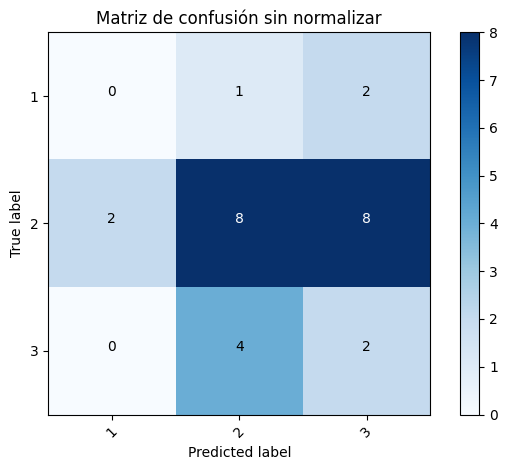

In [62]:
# Visualizamos la matriz de confusión con las predicciones de este dataframe
int_rate_pred = df_pred['Interest_Rate']
cnf_matrix_pred = confusion_matrix(int_rate_pred, resultado_lab, labels=clases)
np.set_printoptions(precision=2)

# Creamos una figura
plt.figure()

# Ejecutamos la función para generar el plot de la matriz de confusión
plot_confusion_matrix(cnf_matrix_pred, classes=clases, title='Matriz de confusión sin normalizar')


[*] *La alta cantidad de errores se debe a la baja correlación que tiene la variable objetivo con el resto de las variables*

# Monitorización con Tensorboard

Más información: https://www.tensorflow.org/tensorboard/

In [63]:
# Importamos TensorBoard desde keras.callbacks

from keras.callbacks import TensorBoard

In [66]:
# Creamos un path para el log (si es Windows utilizar '\\', si es Linux o MacOS utilizar '\'). 
    # Se puede crear un directorio único utilizando timestamp:
        # timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
        # log_directory = log_directory + '\\' + timestamp

log_directory = 'logs\\fit'

# Creamos el objeto board instanciando a TensorBoard
"""
Lo que hará TensorBoard es ir guardando una imagen por cada iteración para poder visualizar posteriormente cuál ha sido la evolución y el ajuste
de los parámetros de nuestra red neuronal
"""
board = TensorBoard(
    log_dir=log_directory,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1
)



## Entrenamiento

Realizamos un entrenamiento normal, como el que hicimos previamente, pero indicando board en los callbacks

In [67]:
# Creamos un modelo secuencial
model = Sequential()

# Iteramos una variable con un número de neuronas igual a la cantidad de variables de entrada
num_neuronas = X_train.shape[1]

# Iteramos una variable con un número de neuronas igual a la cantidad de categorías a predecir
num_neuronas_salida = len(df['Interest_Rate'].unique())

# Creamos una capa oculta con una neurona por cada variable de entrada con función de activación ReLu
model.add(Dense(units=num_neuronas, activation='relu'))

# Creamos otra capa oculta con la mitad de neuronas (suele hacerse para acelerar el entrenamiento) con función de activación ReLu
model.add(Dense(units=num_neuronas/2, activation='relu'))

# Creamos una capa de salida con una neurona por cada variable de salida con función de activación Softmax (recomendada para clasificación multiclase)
model.add(Dense(units=num_neuronas_salida, activation='softmax'))

# Compilamos el modelo con optimizador adam, categorical_crossentropy en las pérdidas y como métrica categorical_accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Ajustamos nuestro modelo a los conjuntos de entrenamiento, con 200 epochs y un tamaño de batch de 256 haciendo llamado a early_stop
model.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, board],
    verbose=1
)

Epoch 1/200
482/482 [==============================] - 35s 61ms/step - loss: 0.9957 - categorical_accuracy: 0.4913 - val_loss: 0.9610 - val_categorical_accuracy: 0.5192
Epoch 2/200
482/482 [==============================] - 10s 21ms/step - loss: 0.9616 - categorical_accuracy: 0.5178 - val_loss: 0.9569 - val_categorical_accuracy: 0.5239
Epoch 3/200
482/482 [==============================] - 9s 18ms/step - loss: 0.9590 - categorical_accuracy: 0.5196 - val_loss: 0.9561 - val_categorical_accuracy: 0.5237
Epoch 4/200
482/482 [==============================] - 8s 16ms/step - loss: 0.9577 - categorical_accuracy: 0.5207 - val_loss: 0.9548 - val_categorical_accuracy: 0.5227
Epoch 5/200
482/482 [==============================] - 7s 15ms/step - loss: 0.9565 - categorical_accuracy: 0.5208 - val_loss: 0.9537 - val_categorical_accuracy: 0.5243
Epoch 6/200
482/482 [==============================] - 5s 10ms/step - loss: 0.9556 - categorical_accuracy: 0.5219 - val_loss: 0.9530 - val_categorical_accurac

## Ejecutar Tensorboard

Tensorboard estará operativa localmente en http://localhost:6006/

Debemos abrir cmd, dirigirnos hasta la ruta del fichero py (pwd) y ejecutar: tensorboard --logdir logs\fit

In [68]:
# Ver la ruta del fichero
pwd

'c:\\Users\\pety2\\OneDrive\\Documentos\\Programacion\\Python\\Master IA'